<a href="https://colab.research.google.com/github/EXCEEDEDDOSE/Tampered_Image_Detection_Using_ELA-DeepLearning/blob/main/imagetampering_detection2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/CASIA2

/content/drive/MyDrive/aiswarya/CASIA2


In [ ]:
ls

 au/  'imagetampering detection2.ipynb'   model_casia_run1.h5   Tp/


In [ ]:
import matplotlib as matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

In [ ]:
np.random.seed(2)
print(np.random.seed(2))

None


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

 # convert to one-hot-encoding
from keras.utils import to_categorical


In [ ]:
sns.set(style='white', context='notebook', palette='deep')
print(sns.set(style='white', context='notebook', palette='deep'))

None


In [ ]:
#error level analysis:data prepration

from PIL import Image
import os
from pylab import *
import re
from PIL import Image, ImageChops, ImageEnhance


In [ ]:
#upto my knowledge path of all the images inside the test is return in an array
def get_imlist(path):
    return [os.path.join(path,f) for f in os.listdir(path) if f.endswith('.jpg') or f.endswith('.png')]
get_imlist("/content/drive/MyDrive/CASIA2")

[]

Size: (384, 256)


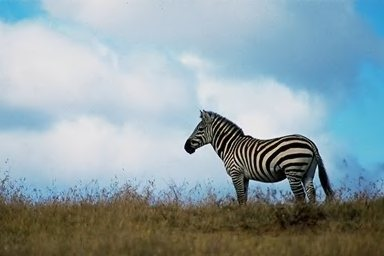

In [ ]:
def original():
  ori=Image.open(r"au/Au_ani_00001.jpg")
  print("Size:",ori.size)
  return ori
original()


In [ ]:
def convert_to_ela_image(path, quality):
    temp_filename = 'temp_file_name.jpg'
    ela_filename = 'temp_ela.png'
    image = Image.open(path).convert('RGB')
    image.save(temp_filename, 'JPEG', quality = quality)
    temp_image = Image.open(temp_filename)
    ela_image = ImageChops.difference(image, temp_image)
    extrema = ela_image.getextrema()
    max_diff = max([ex[1] for ex in extrema])
    if max_diff == 0:
        max_diff = 1
    scale = 255.0 / max_diff
    ela_image = ImageEnhance.Brightness(ela_image).enhance(scale)
    return ela_image

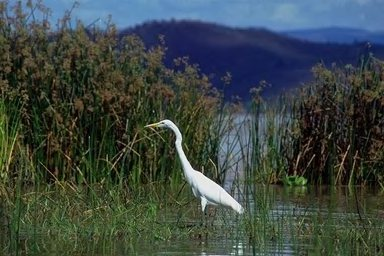

In [ ]:
Image.open("au/Au_ani_00002.jpg")

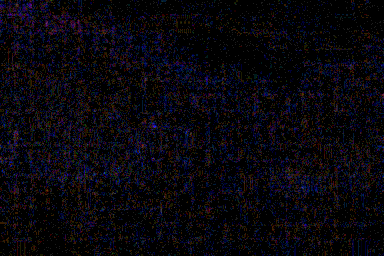

In [ ]:
#conversion of real into ela
convert_to_ela_image("au/Au_ani_00002.jpg",100)

size: (384, 256)


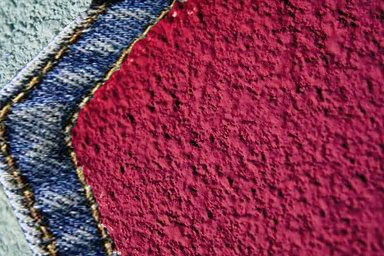

In [ ]:
#fake image
def tamp():
  tam = Image.open("Tp/Tp_D_CND_S_N_txt00028_txt00006_10848.jpg")
  print("size:",tam.size)
  return tam
tamp()

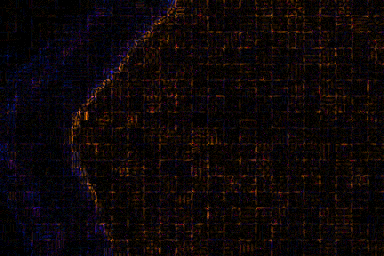

In [ ]:
#conversion of ela into ela
convert_to_ela_image("Tp/Tp_D_CND_S_N_txt00028_txt00006_10848.jpg",100)

In [ ]:
#after resizeing the image:-reduce the resolution
image_size = (128, 128)
def prepare_image(image_path):
    return convert_to_ela_image(image_path, 90).resize(image_size)


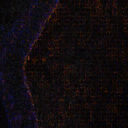

In [ ]:
#resized fake image
prepare_image("Tp/Tp_D_CND_S_N_txt00028_txt00006_10848.jpg")

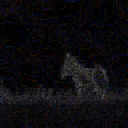

In [ ]:
#resized real image
prepare_image("au/Au_ani_00001.jpg")

In [ ]:
#convert the ela into numpy array
image_size = (128, 128)
def prepare_image(image_path):
    return np.array(convert_to_ela_image(image_path, 90).resize(image_size))
prepare_image("au/Au_ani_00001.jpg")


array([[[15,  7, 36],
        [ 5, 12, 17],
        [15, 15, 11],
        ...,
        [ 2,  2,  2],
        [ 8,  8,  2],
        [17, 17,  0]],

       [[ 9, 11, 27],
        [ 1,  1,  5],
        [ 7,  7,  7],
        ...,
        [ 2,  3,  3],
        [ 4,  4,  3],
        [ 2,  2,  1]],

       [[10, 11, 18],
        [ 4,  1, 32],
        [13,  3, 23],
        ...,
        [ 3,  3,  3],
        [ 6,  7,  7],
        [ 8,  8,  3]],

       ...,

       [[ 9,  8, 10],
        [14, 15, 15],
        [11, 12, 12],
        ...,
        [17, 16, 20],
        [ 9, 10, 11],
        [21, 19, 11]],

       [[ 6, 11, 19],
        [ 3, 15, 15],
        [12, 14, 18],
        ...,
        [16,  6, 33],
        [ 8, 14, 27],
        [ 9,  9, 26]],

       [[ 9, 11, 10],
        [13, 14, 15],
        [10, 10, 11],
        ...,
        [ 5,  4,  6],
        [ 4,  5,  5],
        [ 5,  5,  7]]], dtype=uint8)

array([[[15,  7, 36],
        [ 5, 12, 17],
        [15, 15, 11],
        ...,
        [ 2,  2,  2],
        [ 8,  8,  2],
        [17, 17,  0]],

       [[ 9, 11, 27],
        [ 1,  1,  5],
        [ 7,  7,  7],
        ...,
        [ 2,  3,  3],
        [ 4,  4,  3],
        [ 2,  2,  1]],

       [[10, 11, 18],
        [ 4,  1, 32],
        [13,  3, 23],
        ...,
        [ 3,  3,  3],
        [ 6,  7,  7],
        [ 8,  8,  3]],

       ...,

       [[ 9,  8, 10],
        [14, 15, 15],
        [11, 12, 12],
        ...,
        [17, 16, 20],
        [ 9, 10, 11],
        [21, 19, 11]],

       [[ 6, 11, 19],
        [ 3, 15, 15],
        [12, 14, 18],
        ...,
        [16,  6, 33],
        [ 8, 14, 27],
        [ 9,  9, 26]],

       [[ 9, 11, 10],
        [13, 14, 15],
        [10, 10, 11],
        ...,
        [ 5,  4,  6],
        [ 4,  5,  5],
        [ 5,  5,  7]]], dtype=uint8)

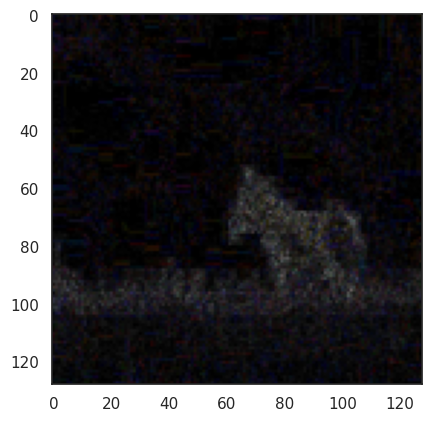

In [ ]:
#image plot using matplotlib

image_size = (128, 128)
def prepare_image(image_path):
    return np.array(convert_to_ela_image(image_path, 90).resize(image_size))
plt.imshow(prepare_image("au/Au_ani_00001.jpg"))
prepare_image("au/Au_ani_00001.jpg")

In [ ]:
#flattening
image_size = (128, 128)
def prepare_image(image_path):
    return np.array(convert_to_ela_image(image_path, 90).resize(image_size)).flatten()
prepare_image("au/Au_ani_00001.jpg")

array([15,  7, 36, ...,  5,  5,  7], dtype=uint8)

In [ ]:
#normilisation for one image

image_size = (128, 128)
def prepare_image(image_path):
    return np.array(convert_to_ela_image(image_path, 90).resize(image_size)).flatten()/255.0



In [ ]:
#Define two empty array

X = [] # ELA converted images
Y = [] # 0 for fake, 1 for real

In [ ]:
#process real image set

import random
path = 'au/'

for dirname, _, filenames in os.walk(path):

    for filename in filenames:
        if filename.endswith('jpg') or filename.endswith('png'):
            full_path = os.path.join(dirname, filename)
            X.append(prepare_image(full_path))
            Y.append(1)
            if len(Y) % 500 == 0:
                print(f'Processing {len(Y)} images')


Processing 500 images
Processing 1000 images
Processing 1500 images
Processing 2000 images
Processing 2500 images
Processing 3000 images
Processing 3500 images
Processing 4000 images
Processing 4500 images
Processing 5000 images


In [ ]:
print(X)


[array([0.        , 0.        , 0.        , ..., 0.        , 0.02352941,
       0.18431373]), array([0.        , 0.        , 0.        , ..., 0.        , 0.02745098,
       0.08627451]), array([0., 0., 0., ..., 0., 0., 0.]), array([0.01568627, 0.00784314, 0.00392157, ..., 0.05098039, 0.03529412,
       0.08235294]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0.0627451 , 0.01568627, 0.09019608, ..., 0.03137255, 0.03137255,
       0.01568627]), array([0., 0., 0., ..., 0., 0., 0.]), array([0.02745098, 0.03921569, 0.03921569, ..., 0.        , 0.        ,
       0.        ]), array([0.01568627, 0.00784314, 0.01176471, ..., 0.02352941, 0.01960784,
       0.01960784]), array([0.00392157, 0.00392157, 0.        , ..., 0.01176471, 0.05882353,
       0.22745098]), array([0., 0., 0., ..., 0., 0., 0.]), array(

In [ ]:
#values in y for real images
print(Y)
print(len(Y))


[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [ ]:
#shuffle and take  2100 images from au

random.shuffle(X)

X = X[:2100]
Y = Y[:2100]
print(len(X), len(Y))




2100 2100


In [ ]:
#process fake images

path = 'Tp/'
for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        if filename.endswith('jpg') or filename.endswith('png'):
            full_path = os.path.join(dirname, filename)
            X.append(prepare_image(full_path))
            Y.append(0)
            if len(Y) % 500 == 0:
                print(f'Processing {len(Y)} images')


Processing 2500 images
Processing 3000 images
Processing 3500 images
Processing 4000 images


In [ ]:
#after processing real and fake:total normalised images stored in x
print(X)

[array([0.04313725, 0.07843137, 0.01568627, ..., 0.03529412, 0.03529412,
       0.03529412]), array([0.01176471, 0.01176471, 0.01176471, ..., 0.11764706, 0.13333333,
       0.24313725]), array([0.        , 0.        , 0.10980392, ..., 0.05098039, 0.05098039,
       0.05098039]), array([0.03137255, 0.03137255, 0.04705882, ..., 0.01176471, 0.01568627,
       0.01960784]), array([0.03529412, 0.03529412, 0.03529412, ..., 0.02745098, 0.01960784,
       0.09803922]), array([0.        , 0.        , 0.        , ..., 0.04313725, 0.03921569,
       0.03921569]), array([0.01568627, 0.01568627, 0.01960784, ..., 0.05098039, 0.05098039,
       0.05490196]), array([0.        , 0.        , 0.        , ..., 0.00392157, 0.00392157,
       0.00392157]), array([0.        , 0.        , 0.        , ..., 0.01960784, 0.01568627,
       0.03529412]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0.11764706, 0.1372549 , 0.1372549 , ..., 0.1254902 , 0.16078431,
       0.14509

In [ ]:
#after processing

print(Y)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [ ]:
print("length of X:",len(X))
print("length of Y:",len(Y))
print(shape(X))
print(shape(Y))

length of X: 4174
length of Y: 4174
(4174, 49152)
(4174,)


In [ ]:
X = np.array(X)
Y = to_categorical(Y, 2)

In [ ]:
Y

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [ ]:
X = X.reshape(-1, 128, 128, 3)

In [ ]:
print("length of X:",len(X))
print("length of Y:",len(Y))
print(shape(X))
print(shape(Y))

length of X: 4174
length of Y: 4174
(4174, 128, 128, 3)
(4174, 2)


In [ ]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority', random_state = 1)

X,Y = oversample.fit_resample(X, Y)

In [ ]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size = 0.2, random_state=25)
X = X.reshape(-1,1,1,1)


In [ ]:
X_train

array([[[[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.00392157, 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.00392157, 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.00392157, 0.00392157, 0.00392157]],

        [[0.00392157, 0.00392157, 0.00392157],
         [0.        , 0.        , 0.        ],
         [0.00392157, 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        ...,

        [[0.01568627, 0.01568627, 0.01568627],
         [0.01176471, 0.01176471, 0.01176471]

In [ ]:
Y_train

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [ ]:
print('Training:',len(X_train), len(Y_train))
print('Testing:',len(X_val), len(Y_val))


Training: 3339 3339
Testing: 835 835


In [ ]:
len(Y_val)

835

### MODEL CREATION

In [ ]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D,AveragePooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization

In [ ]:
def build_model():
    model = Sequential()
    model.add(Conv2D(filters=32,kernel_size=(2,2),activation='relu',input_shape=(128,128,3)))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(filters=32,kernel_size=(2,2),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Flatten())
    model.add(Dense(units=64,activation='relu'))
    model.add(Dropout(0.5))
    model.add(BatchNormalization())
    model.add(Dense(units=16,activation='relu'))
    model.add(Dropout(0.5))
    model.add(BatchNormalization())
    model.add(Dense(units=2,activation='softmax'))
    return model

def build_model():
    model = tensorflow .keras.Sequential()
    model.add(Conv2D(filters = 32, kernel_size = (5, 5), padding = 'valid', activation = 'relu', input_shape = (128, 128, 3)))
    model.add(MaxPooling2D(pool_size = (2, 2)))
    model.add(Conv2D(filters = 32, kernel_size = (5, 5), padding = 'valid', activation = 'relu', input_shape = (128, 128, 3)))
    model.add(MaxPooling2D(pool_size = (2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(256, activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation = 'softmax'))
    return model

In [ ]:
model = build_model()
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 127, 127, 32)      416       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 32)        4128      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 31, 31, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 30752)             0         
                                                                 
 dense (Dense)               (None, 64)                1

In [ ]:
epochs = 100
batch_size = 32
init_lr = 1e-4
optimizer = Adam(learning_rate = init_lr)


In [ ]:
def lr_schedule(epochs):
    return initial_learning_rate * 0.9 ** epochs

In [ ]:
from keras.callbacks import LearningRateScheduler
lr_scheduler = LearningRateScheduler(lr_schedule)

In [ ]:
model.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])


In [ ]:
early_stopping = EarlyStopping(monitor = 'val_acc',
                              min_delta = 0,
                              patience = 2,
                              verbose = 0,
                              mode = 'auto')

In [ ]:
X_train.shape

NameError: ignored

In [ ]:
hist = model.fit(X_train,Y_train,batch_size = batch_size,epochs = epochs,validation_data = (X_val, Y_val),callbacks=[lr_scheduler])
model.save('model_casia_run12.h5')


Epoch 1/100
105/105 [==============================] - 2s 19ms/step - loss: 0.2094 - accuracy: 0.9305 - val_loss: 0.2412 - val_accuracy: 0.9018 - lr: 1.0000e-04
Epoch 2/100
105/105 [==============================] - 2s 15ms/step - loss: 0.1916 - accuracy: 0.9452 - val_loss: 0.2250 - val_accuracy: 0.9257 - lr: 9.0000e-05
Epoch 3/100
105/105 [==============================] - 2s 15ms/step - loss: 0.1766 - accuracy: 0.9470 - val_loss: 0.2201 - val_accuracy: 0.9234 - lr: 8.1000e-05
Epoch 4/100
105/105 [==============================] - 2s 16ms/step - loss: 0.1688 - accuracy: 0.9482 - val_loss: 0.2216 - val_accuracy: 0.9257 - lr: 7.2900e-05
Epoch 5/100
105/105 [==============================] - 2s 16ms/step - loss: 0.1590 - accuracy: 0.9527 - val_loss: 0.2217 - val_accuracy: 0.9138 - lr: 6.5610e-05
Epoch 6/100
105/105 [==============================] - 2s 15ms/step - loss: 0.1371 - accuracy: 0.9629 - val_loss: 0.2221 - val_accuracy: 0.9186 - lr: 5.9049e-05
Epoch 7/100
105/105 [=============

### PREDICT

In [ ]:
class_names = ['fake', 'real']

In [ ]:
real_image_path = '/content/drive/MyDrive/CASIA2/temp_file_name.jpg'#DRIVE REAL IMG LOC
Image.open(real_image_path)
image = prepare_image(real_image_path)
image = image.reshape(-1, 128, 128, 3)
y_pred = model.predict(image)
y_pred_class = np.argmax(y_pred, axis = 1)[0]
print(y_pred)
print(y_pred_class)
print(f'Class: {class_names[y_pred_class]} Confidence: {np.amax(y_pred) * 100:0.2f}')

1/1 [==============================] - 0s 27ms/step
[[0.03314661 0.96685344]]
1
Class: real Confidence: 96.69


In [ ]:
fake_image_path = '/content/drive/MyDrive/dog2.jpeg'#DRIVE FAKE IMG LOC
Image.open(real_image_path)
image = prepare_image(real_image_path)
image = image.reshape(-1, 128, 128, 3)
y_pred = model.predict(image)
y_pred_class = np.argmax(y_pred, axis = 1)[0]
print(y_pred)
print(y_pred_class)
print(f'Class: {class_names[y_pred_class]} Confidence: {np.amax(y_pred) * 100:0.2f}')

1/1 [==============================] - 0s 28ms/step
[[0.01970227 0.98029774]]
1
Class: real Confidence: 98.03
